In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import requests
import json

In [2]:
# load in csv
olympics_data = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding="latin-1")
olympics_data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [36]:
# create new column for medal point values

olympics_data["Medal Point"]

0         
1         
2         
3         
4         
        ..
15428     
15429     
15430     
15431     
15432     
Name: Medal Point, Length: 15433, dtype: object

In [37]:
olympics_data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Medal Point
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,
...,...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze,
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold,
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver,
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold,


In [130]:
# assign values for medals


medal_point_dict= {'Gold': 3, 'Silver':2, 'Bronze': 1}
olympics_data["Medal Point"]= olympics_data["Medal"].map(medal_dict)

olympics_data["Medal Point"]

0        2.0
1        1.0
2        3.0
3        2.0
4        1.0
        ... 
15428    1.0
15429    3.0
15430    2.0
15431    3.0
15432    3.0
Name: Medal Point, Length: 15433, dtype: float64

In [131]:
olympics_data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Medal Point
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,2.0
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,1.0
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,3.0
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,2.0
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze,1.0
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold,3.0
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver,2.0
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold,3.0


In [356]:
# Groupby Country & Sport

medals_x_country_sp = olympics_data.groupby(['Country', 'Sport'])

medals_x_country_sp

In [357]:
medals_x_country_sp.describe()

Year                                                 \
                      count         mean       std     min     25%     50%   
Country     Sport                                                            
Afghanistan Taekwondo   1.0  2008.000000       NaN  2008.0  2008.0  2008.0   
Algeria     Athletics   6.0  1998.000000  3.346640  1992.0  1997.0  2000.0   
            Boxing      6.0  1992.000000  6.693280  1984.0  1986.0  1994.0   
            Judo        2.0  2008.000000  0.000000  2008.0  2008.0  2008.0   
Argentina   Aquatics    1.0  2004.000000       NaN  2004.0  2004.0  2004.0   
...                     ...          ...       ...     ...     ...     ...   
Yugoslavia  Wrestling   9.0  1982.222222  4.055175  1976.0  1980.0  1984.0   
Zambia      Athletics   1.0  1996.000000       NaN  1996.0  1996.0  1996.0   
            Boxing      1.0  1984.000000       NaN  1984.0  1984.0  1984.0   
Zimbabwe    Aquatics    7.0  2006.285714  2.138090  2004.0  2004.0  2008.0   
            Hockey     16.0  1980.000000  0.000000  1980.0  1980.0  1980.0   

                                      Medal Point                           \
                          75%     max       count      mean       std  min   
Country     Sport                                                            
Afghanistan Taekwondo  2008.0  2008.0         1.0  1.000000       NaN  1.0   
Algeria     Athletics  2000.0  2000.0         6.0  2.166667  0.983192  1.0   
            Boxing     1996.0  2000.0         6.0  1.333333  0.816497  1.0   
            Judo       2008.0  2008.0         2.0  1.500000  0.707107  1.0   
Argentina   Aquatics   2004.0  2004.0         1.0  1.000000       NaN  1.0   
...                       ...     ...         ...       ...       ...  ...   
Yugoslavia  Wrestling  1984.0  1988.0         9.0  2.000000  0.866025  1.0   
Zambia      Athletics  1996.0  1996.0         1.0  2.000000       NaN  2.0   
            Boxing     1984.0  1984.0         1.0  1.000000       NaN  1.0   
Zimbabwe    Aquatics   2008.0  2008.0         7.0  2.142857  0.690066  1.0   
            Hockey     1980.0  1980.0        16.0  3.000000  0.000000  3.0   

                                             
                        25%  50%   75%  max  
Country     Sport                            
Afghanistan Taekwondo  1.00  1.0  1.00  1.0  
Algeria     Athletics  1.25  2.5  3.00  3.0  
            Boxing     1.00  1.0  1.00  3.0  
            Judo       1.25  1.5  1.75  2.0  
Argentina   Aquatics   1.00  1.0  1.00  1.0  
...                     ...  ...   ...  ...  
Yugoslavia  Wrestling  1.00  2.0  3.00  3.0  
Zambia      Athletics  2.00  2.0  2.00  2.0  
            Boxing     1.00  1.0  1.00  1.0  
Zimbabwe    Aquatics   2.00  2.0  2.50  3.0  
            Hockey     3.00  3.0  3.00  3.0  

[828 rows x 16 columns]

In [358]:
# Create dataframe

medals_by_sport = medals_x_country_sp['Medal'].count()

medals_by_sport

point_total= medals_x_country_sp['Medal Point'].sum()

In [359]:
medal_summary = pd.DataFrame({'By Sport': medals_by_sport, 'Point Total': point_total})

medal_summary

By Sport  Point Total
Country     Sport                           
Afghanistan Taekwondo         1          1.0
Algeria     Athletics         6         13.0
            Boxing            6          8.0
            Judo              2          3.0
Argentina   Aquatics          1          1.0
...                         ...          ...
Yugoslavia  Wrestling         9         18.0
Zambia      Athletics         1          2.0
            Boxing            1          1.0
Zimbabwe    Aquatics          7         15.0
            Hockey           16         48.0

[828 rows x 2 columns]

<AxesSubplot:xlabel='Country,Sport'>

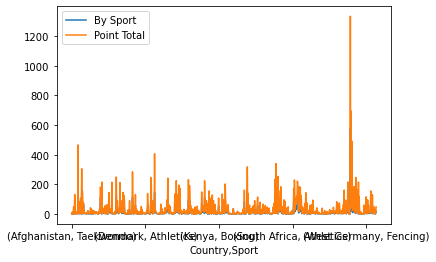

In [360]:
# Plot the Sum of Medal Points

medal_summary.plot.line(x=None, y=None)

<AxesSubplot:ylabel='Country,Sport'>

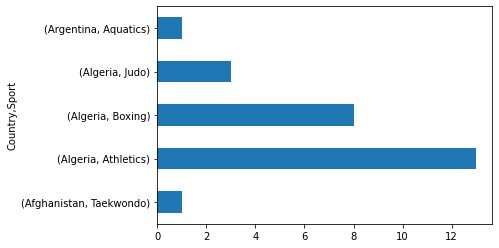

In [361]:
# Graph Cleanup

# change the plot to a horizontal bar graph

medals_x_country_sp['Medal Point'].sum().head(5).plot(kind='barh')

In [362]:
# reset the index

sports_data= medals_x_country_sp['Medal Point'].sum().reset_index()

<AxesSubplot:ylabel='Sport'>

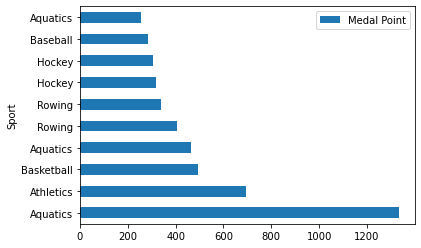

In [363]:
# sort values

sports_data.sort_values(['Medal Point'], ascending=False).head(10).plot(kind='barh', y='Medal Point', x='Sport')

In [364]:
# describe Individual Sports

sports_data['Sport'].describe()

count           828
unique           28
top       Athletics
freq             77
Name: Sport, dtype: object

In [366]:
# display Individual Sports

sports_data['Sport'].unique()

array(['Taekwondo', 'Athletics', 'Boxing', 'Judo', 'Aquatics',
       'Basketball', 'Cycling', 'Football', 'Hockey', 'Sailing', 'Tennis',
       'Volleyball', 'Weightlifting', 'Wrestling', 'Archery', 'Baseball',
       'Canoe / Kayak', 'Equestrian', 'Gymnastics', 'Rowing', 'Shooting',
       'Softball', 'Triathlon', 'Modern Pentathlon', 'Badminton',
       'Fencing', 'Handball', 'Table Tennis'], dtype=object)

<AxesSubplot:xlabel='Country,Sport'>

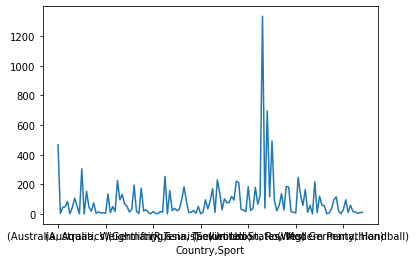

In [433]:
# Plot the sum of the medal points for chosen countries by sport

sports = ['Gymnastics', 'Basketball', 'Aquatics', 'Sailing', 'Athletics']
countries = ['West Germany', 'Soviet Union', 'United States', 'Australia', 'Germany', 'Russia']
sport_df = olympics_data.loc[olympics_data['Country'].isin(countries)]
sport_df

# group by Country Code and Sport
sport_df.groupby(['Country', 'Sport'])['Medal Point'].sum().plot() 

<AxesSubplot:title={'center':'MMedal Point Total for Country by All Sports.png'}, xlabel='Sport'>

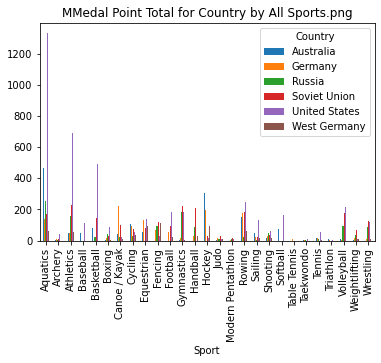

In [470]:
# Unstack & plot as bar graph

sport_df.groupby(['Sport', 'Country'])['Medal Point'].sum().unstack().plot(kind='bar', title='Medal Point Total for Country by All Sports')

In [469]:
plt.savefig('Medal Point Total for Country by All Sports.png', dpi=300)

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='Country,Sport'>

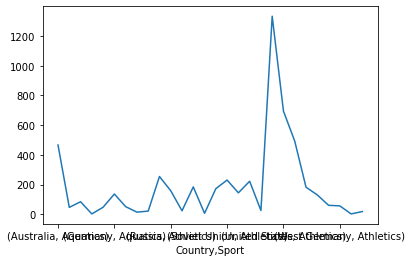

In [436]:
# Refine data and Plot chosen Sports

limited_sports = sport_df.loc[sport_df['Sport'].isin(sports)]
limited_sports

#  group Medal Points by Country Code and Sport

limited_sports.groupby(['Country', 'Sport'])['Medal Point'].sum().plot()

<AxesSubplot:title={'center':'Medal Point Total for selected Countries by selected Sports'}, xlabel='Sport'>

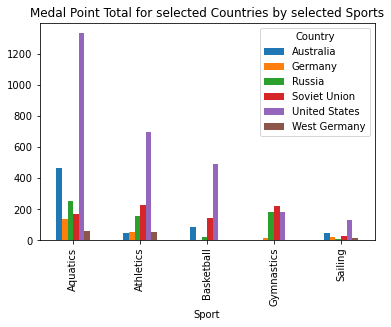

In [452]:
# Unstack and Plot as bar graph

limited_sports.groupby(['Sport', 'Country'])['Medal Point'].sum().unstack().plot(kind='bar', title='Medal Point Total for selected Countries by selected Sports')

In [453]:
plt.savefig('Medal Point Total for selected Countries by selected Sports.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [454]:
# Groupby Year & Country 

medals_x_country_yr = olympics_data.groupby(['Year', 'Country'])
medals_x_country_yr

In [455]:
medals_x_country_yr.describe()

Medal Point                                              
                           count      mean       std  min  25%  50%   75%  max
Year   Country                                                                
1976.0 Australia            24.0  1.666667  0.481543  1.0  1.0  2.0  2.00  2.0
       Austria               1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
       Belgium               9.0  1.333333  0.500000  1.0  1.0  1.0  2.00  2.0
       Bermuda*              1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
       Brazil                3.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
...                          ...       ...       ...  ...  ...  ...   ...  ...
2008.0 United States       315.0  2.139683  0.797795  1.0  1.0  2.0  3.00  3.0
       Uzbekistan            6.0  1.666667  0.816497  1.0  1.0  1.5  2.00  3.0
       Venezuela             1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
       Vietnam               1.0  2.000000       NaN  2.0  2.0  2.0  2.00  2.0
       Zimbabwe              4.0  2.250000  0.500000  2.0  2.0  2.0  2.25  3.0

[559 rows x 8 columns]

In [456]:
#Create dataframe

medals_by_yr = medals_x_country_yr['Medal Point'].sum()

In [457]:
year_stats = pd.DataFrame({'Point Total': medals_by_yr})
year_stats

Point Total
Year   Country                   
1976.0 Australia             40.0
       Austria                1.0
       Belgium               12.0
       Bermuda*               1.0
       Brazil                 3.0
...                           ...
2008.0 United States        674.0
       Uzbekistan            10.0
       Venezuela              1.0
       Vietnam                2.0
       Zimbabwe               9.0

[559 rows x 1 columns]

<AxesSubplot:xlabel='Year,Country'>

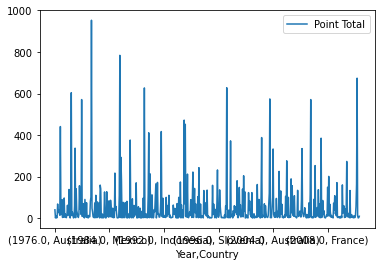

In [458]:
# Plot the Sum of Medal Points

year_stats.plot.line(x=None, y=None)

<AxesSubplot:ylabel='Year,Country'>

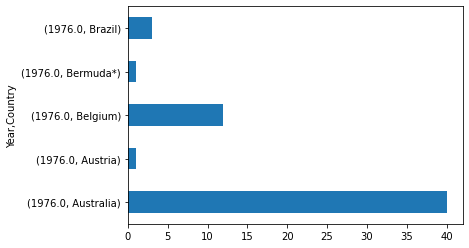

In [459]:
# Graph Cleanup

# change the plot to a horizontal bar graph

medals_x_country_yr['Medal Point'].sum().head(5).plot(kind='barh')

In [460]:
# reset the index

country_data= medals_x_country_yr['Medal Point'].sum().reset_index()

<AxesSubplot:ylabel='Country'>

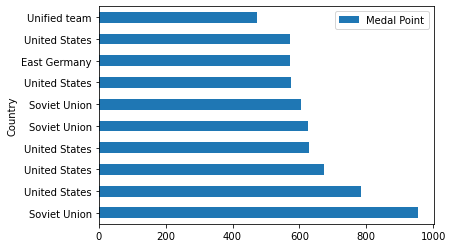

In [461]:
# sort values

country_data.sort_values(['Medal Point'], ascending=False).head(10).plot(kind='barh', y='Medal Point', x='Country')

In [462]:
# describe Individual Countries

country_data['Country'].describe()

count             559
unique            127
top       Netherlands
freq                9
Name: Country, dtype: object

In [463]:
# display Individual Countries

country_data['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Bermuda*', 'Brazil',
       'Bulgaria', 'Canada', 'Cuba', 'Czechoslovakia', 'Denmark',
       'East Germany', 'Finland', 'France', 'Hungary', 'Iran', 'Italy',
       'Jamaica', 'Japan', 'Korea, North', 'Korea, South', 'Mexico',
       'Mongolia', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan',
       'Poland', 'Portugal', 'Puerto Rico*', 'Romania', 'Soviet Union',
       'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Trinidad and Tobago', 'United Kingdom', 'United States',
       'Venezuela', 'West Germany', 'Yugoslavia', 'Ethiopia', 'Greece',
       'Guyana', 'India', 'Ireland', 'Lebanon', 'Tanzania', 'Uganda',
       'Zimbabwe', 'Algeria', 'Cameroon', 'China', 'Colombia',
       "Cote d'Ivoire", 'Dominican Republic', 'Egypt', 'Iceland', 'Kenya',
       'Morocco', 'Nigeria', 'Peru', 'Syria', 'Taiwan', 'Turkey',
       'Zambia', 'Argentina', 'Chile', 'Costa Rica', 'Djibouti',
       'Indonesia', 'Netherlands Antilles*', 'Philippines

<AxesSubplot:xlabel='Country,Year'>

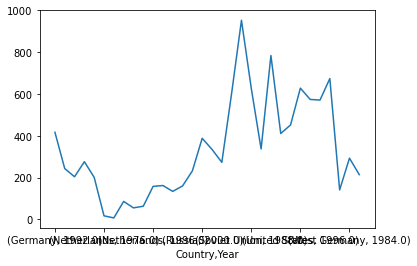

In [464]:
# Refine data and Plot chosen countrys

countries_2 = ['West Germany', 'Soviet Union', 'United States', 'Netherlands', 'Germany', 'Russia']

year_df = olympics_data.loc[olympics_data['Country'].isin(countries_2)]
year_df

#  group Medal Points by Country and Year
year_df.groupby(['Country', 'Year'])['Medal Point'].sum().plot() 

<AxesSubplot:title={'center':'Medal Point Total for selected Countries by Year'}, xlabel='Year'>

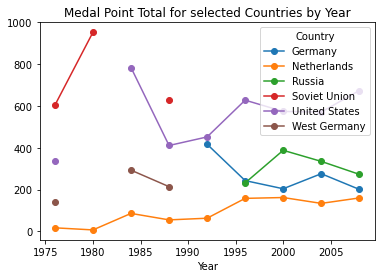

In [465]:
# Unstack and Plot as line graph

year_df.groupby(['Year', 'Country'])['Medal Point'].sum().unstack().plot(title='Medal Point Total for selected Countries by Year', marker='o')

In [466]:
plt.savefig('Medal Point Total for selected Countries by Year.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [467]:
year_df.groupby(['Year', 'Country'])['Medal Point'].sum()

Year    Country      
1976.0  Netherlands       17.0
        Soviet Union     604.0
        United States    337.0
        West Germany     141.0
1980.0  Netherlands        7.0
        Soviet Union     953.0
1984.0  Netherlands       86.0
        United States    784.0
        West Germany     293.0
1988.0  Netherlands       55.0
        Soviet Union     627.0
        United States    411.0
        West Germany     214.0
1992.0  Germany          417.0
        Netherlands       63.0
        United States    452.0
1996.0  Germany          243.0
        Netherlands      158.0
        Russia           232.0
        United States    628.0
2000.0  Germany          204.0
        Netherlands      162.0
        Russia           388.0
        United States    574.0
2004.0  Germany          276.0
        Netherlands      134.0
        Russia           335.0
        United States    571.0
2008.0  Germany          201.0
        Netherlands      160.0
        Russia           273.0
        United St